#NLP for Other Languages

In [1]:
# Please install this library using the below commands
! pip install indic-nlp-datasets==0.1.2

In [2]:
#Importing idatasets
from idatasets import load_devdas

In [3]:
# instantiation ofload_devdas
devdas = load_devdas()
# devdas.data is a generator of paragraphs
para = list(devdas.data)
text = " ".join(para)
#Splitting the text into words
words = text.split(" ")

In [4]:
#Importing counters from collection
from collections import Counter 
count = Counter(words)

In [5]:
#Printing the most common words
count.most_common(10)

[('के', 696),
 ('ने', 676),
 ('नही', 672),
 ('से', 626),
 ('मे', 562),
 ('की', 480),
 ('है', 444),
 ('देवदास', 437),
 ('को', 336),
 ('पार्वती', 332)]

In [6]:
!pip install spacy
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-12-10 17:37:21.766575: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-10 17:37:21.766613: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
# Removing the stopwords.Here hi indicated Hindi like this other languages have other code words
from spacy.lang.hi import Hindi
lang = Hindi()
doc = lang(text)
not_stopwords = []
for token in doc:
  if token.is_stop:
    continue
  if token.is_punct or token.text =="|":
    continue 
  not_stopwords.append(token.text)

In [8]:
#Printing the most common words
not_stopcount = Counter(not_stopwords)
not_stopcount.most_common(10)

[('नही', 782),
 ('देवदास', 472),
 ('कहा-', 390),
 ('पार्वती', 345),
 ('क्या', 237),
 ('दिन', 187),
 ('बात', 168),
 ('तुम', 168),
 ('मै', 160),
 ('चन्द्रमुखी', 154)]

In [9]:
!pip install wordcloud

In [10]:
#Importing wordcloud library,spacy and matplotlib
from wordcloud import WordCloud
from spacy.lang.hi import STOP_WORDS as STOP_WORDS_HI
import matplotlib.pyplot as plt

In [11]:
#Importing requests
#We need to give custom font file
import requests
url = "https://hindityping.info/download/assets/Hindi-Fonts-Unicode/gargi.ttf"
r = requests.get(url, allow_redirects=True)
font_path="gargi.ttf"
with open(font_path, "wb") as fw:
  fw.write(r.content)

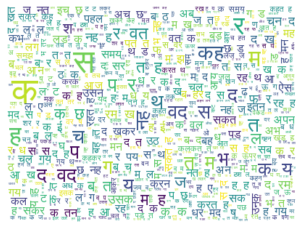

In [12]:
#Printing the wordcloud using matplotlib
wordcloud = WordCloud(width=400,height=300,max_font_size=50,max_words=1000,background_color="white", stopwords=STOP_WORDS_HI,font_path=font_path).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

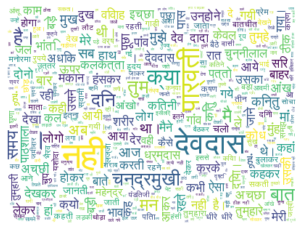

In [13]:
#Printing the wordcloud using matplotlib
wordcloud = WordCloud(width=400,height=300,max_font_size=50,max_words=1000,background_color="white", stopwords=STOP_WORDS_HI,regexp=r"[\u0900-\u097F]+", font_path=font_path).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()